In [8]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import fpsnippets
%matplotlib inline
data = pd.read_csv("farmers market.csv")
df = pd.DataFrame(data)
print(df.head())

    _id  fid                                          name          x  \
0  4159    1              5 Generation Bakers—Green Grocer -80.068177   
1  4160    2  A Child’s World Day Care Center—Green Grocer -79.881320   
2  4161    3       Alma Illery Medical Center—Green Grocer -79.896214   
3  4162    4                         Aspinwall Flea Market -79.904517   
4  4163    5              Bachman’s Greenhouse and Nursery -79.711238   

           y               location                address             city  \
0  40.465622                         1100 Chartiers Avenue     McKees Rocks   
1  40.412364                              300 Rankin Blvd.           Rankin   
2  40.454592                          7227 Hamilton Avenue       Pittsburgh   
3  40.489755  Municipal parking lot      250 Freeport Road       Pittsburgh   
4  40.639294                            2903 Freeport Road  Natrona Heights   

  state    zip                  day_time         season  
0    PA  15136  Tuesday 12:0

In [10]:
def city_filter(group):
    return group.name == "Pittsburgh"
    
markit = df.groupby('city').filter(city_filter)
print(markit.head())

     _id  fid                                     name          x          y  \
2   4161    3  Alma Illery Medical Center—Green Grocer -79.896214  40.454592   
3   4162    4                    Aspinwall Flea Market -79.904517  40.489755   
7   4166    8      Beechview Farmer’s Market—Citiparks -80.024680  40.410619   
9   4168   10               Bloomfield Farmer’s Market -79.944362  40.459080   
12  4171   13         Carrick Dairy District—Citiparks -79.988647  40.400038   

                              location                address        city  \
2                                        7227 Hamilton Avenue  Pittsburgh   
3                Municipal parking lot      250 Freeport Road  Pittsburgh   
7   Broadway Avenue & Beechview Avenue        Broadway Avenue  Pittsburgh   
9                                         5050 Liberty Avenue  Pittsburgh   
12                                      1529 Brownsville Road  Pittsburgh   

   state    zip                   day_time              

In [48]:
#markit['zip'] = df['zip'].astype(str)
#markit['neighborhoods'] = markit['zip'].apply(fpsnippets.zip_to_neighborhoods)
#print(markit)
#print(fpsnippets.zip_to_neighborhoods(15208))
for index, row in markit.iterrows():
    #print(row['zip'])
    markit.at[index, 'neighborhood']=(fpsnippets.geo_to_neighborhood(row['y'], row['x']))
print(markit.head())

     _id  fid                                     name          x          y  \
2   4161    3  Alma Illery Medical Center—Green Grocer -79.896214  40.454592   
3   4162    4                    Aspinwall Flea Market -79.904517  40.489755   
7   4166    8      Beechview Farmer’s Market—Citiparks -80.024680  40.410619   
9   4168   10               Bloomfield Farmer’s Market -79.944362  40.459080   
12  4171   13         Carrick Dairy District—Citiparks -79.988647  40.400038   

                              location                address        city  \
2                                        7227 Hamilton Avenue  Pittsburgh   
3                Municipal parking lot      250 Freeport Road  Pittsburgh   
7   Broadway Avenue & Beechview Avenue        Broadway Avenue  Pittsburgh   
9                                         5050 Liberty Avenue  Pittsburgh   
12                                      1529 Brownsville Road  Pittsburgh   

   state    zip                   day_time              

In [52]:
def neighborhood_filter(group):
    return group.name != "None"
    
markit = markit.groupby('neighborhood').filter(neighborhood_filter)
print(markit.head())

     _id  fid                                     name          x          y  \
2   4161    3  Alma Illery Medical Center—Green Grocer -79.896214  40.454592   
7   4166    8      Beechview Farmer’s Market—Citiparks -80.024680  40.410619   
9   4168   10               Bloomfield Farmer’s Market -79.944362  40.459080   
12  4171   13         Carrick Dairy District—Citiparks -79.988647  40.400038   
17  4176   18             East Liberty Farmer’s Market -79.926390  40.464192   

                              location                address        city  \
2                                        7227 Hamilton Avenue  Pittsburgh   
7   Broadway Avenue & Beechview Avenue        Broadway Avenue  Pittsburgh   
9                                         5050 Liberty Avenue  Pittsburgh   
12                                      1529 Brownsville Road  Pittsburgh   
17                  next to McDonald’s       Penn Circle West  Pittsburgh   

   state    zip                   day_time              

In [71]:
market_counts = markit['neighborhood'].value_counts().reset_index()
market_counts.columns = ['neighborhood', 'market_count']
print(market_counts)

                 neighborhood  market_count
0                East Liberty             3
1   Central Business District             2
2              Homewood South             1
3                   Beechview             1
4                  Bloomfield             1
5                     Carrick             1
6                West Oakland             1
7         Lower Lawrenceville             1
8              East Allegheny             1
9             Central Oakland             1
10           South Side Flats             1


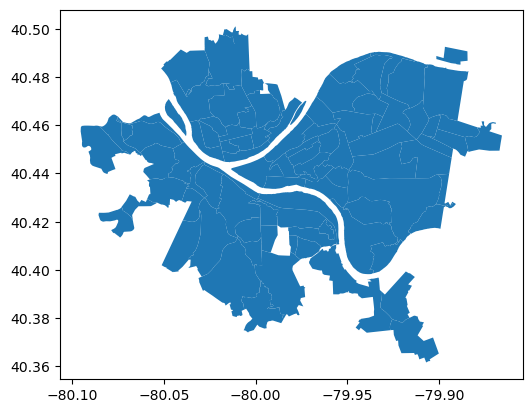

In [62]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe
plt.show()

In [73]:
market_map = neighborhoods.merge(market_counts, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
market_map[['hood','market_count','geometry']]

,hood,market_count,geometry
0,Central Oakland,1.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1.0,"POLYGON ((-79.9623 40.44294, -79.9622 40.44289..."
3,Crawford-Roberts,NaN,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,NaN,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...
85,Ridgemont,NaN,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,West End,NaN,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,California-Kirkbride,NaN,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."
88,Glen Hazel,NaN,"POLYGON ((-79.9203 40.41205, -79.92027 40.4120..."


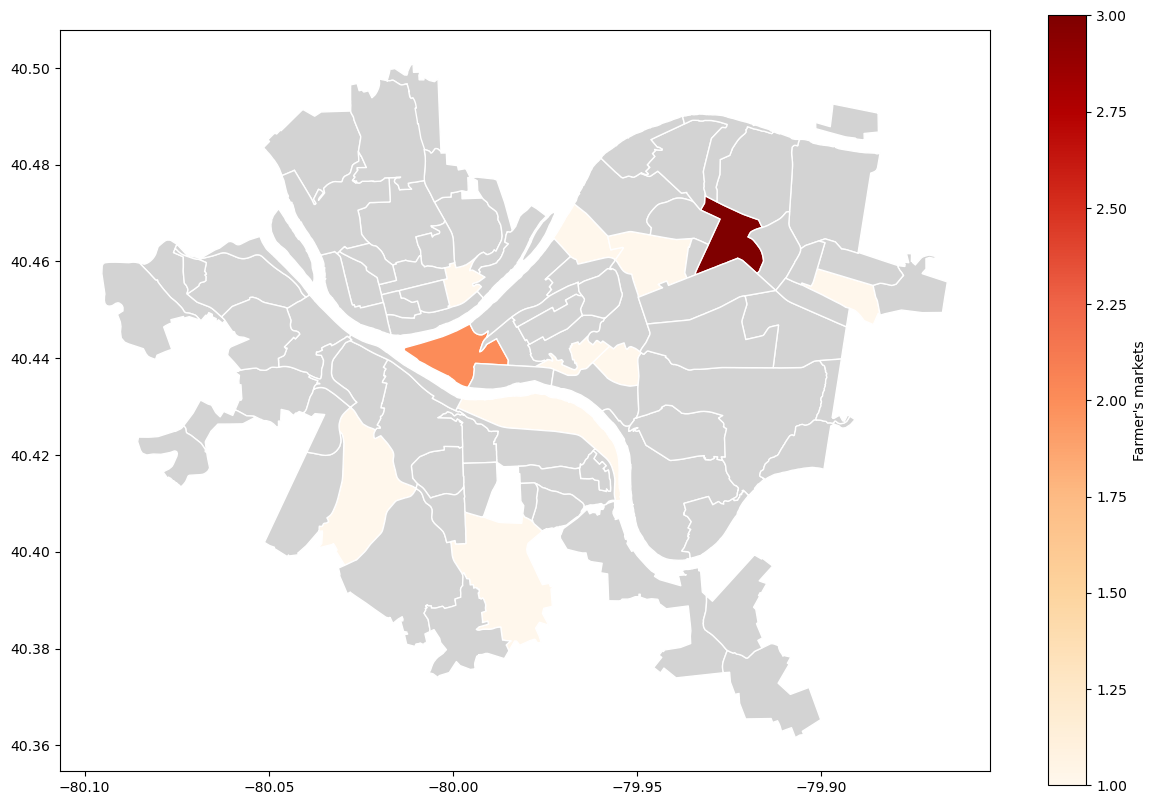

In [76]:
market_map.plot(column='market_count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Farmer's markets"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.show()

Conclusion: Neighborhood with the most farmers markets is **East Liberty**!